In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\swapn\AppData\Local\Temp\ipykernel_30368\2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('daily_wholesale_price_Wheat-upto_apr_2015.csv')
df = df.dropna() # Dropping the null values in the df
print(df.shape)
df.head()

(47164, 4)


,Date,Centre_Name,Commodity_Name,Price
1,01-01-09,DELHI,Wheat,1140.0
5,01-01-09,AMRITSAR,Wheat,1000.0
6,01-01-09,LUDHIANA,Wheat,1100.0
11,01-01-09,BHOPAL,Wheat,1050.0
13,01-01-09,JAIPUR,Wheat,1200.0


In [3]:

df.head()

,Date,Centre_Name,Commodity_Name,Price
1,01-01-09,DELHI,Wheat,1140.0
5,01-01-09,AMRITSAR,Wheat,1000.0
6,01-01-09,LUDHIANA,Wheat,1100.0
11,01-01-09,BHOPAL,Wheat,1050.0
13,01-01-09,JAIPUR,Wheat,1200.0


In [4]:

# Convert 'Date' column to datetime format (if it's not already)
df['Date'] = pd.to_datetime(df['Date'])

# Group by 'Date' and compute the average Price
df = df.groupby('Date')['Price'].mean().reset_index()

# View the result
print(df)


           Date        Price
0    2009-01-01  1172.857143
1    2009-01-04  1265.000000
2    2009-01-05  1095.000000
3    2009-01-06  1268.750000
4    2009-01-07  1206.875000
...         ...          ...
1548 2015-11-02  2020.054545
1549 2015-11-03  2019.309091
1550 2015-12-01  1923.750000
1551 2015-12-02  2032.553571
1552 2015-12-03  2050.218182

[1553 rows x 2 columns]


C:\Users\swapn\AppData\Local\Temp\ipykernel_30368\1097960679.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [5]:
df['Date'] = pd.to_datetime(df['Date'])  # to make sure it is parsed as date
df.set_index('Date',inplace = True)
df

,Price
Date,
2009-01-01,1172.857143
2009-01-04,1265.000000
2009-01-05,1095.000000
2009-01-06,1268.750000
2009-01-07,1206.875000
...,...
2015-11-02,2020.054545
2015-11-03,2019.309091
2015-12-01,1923.750000


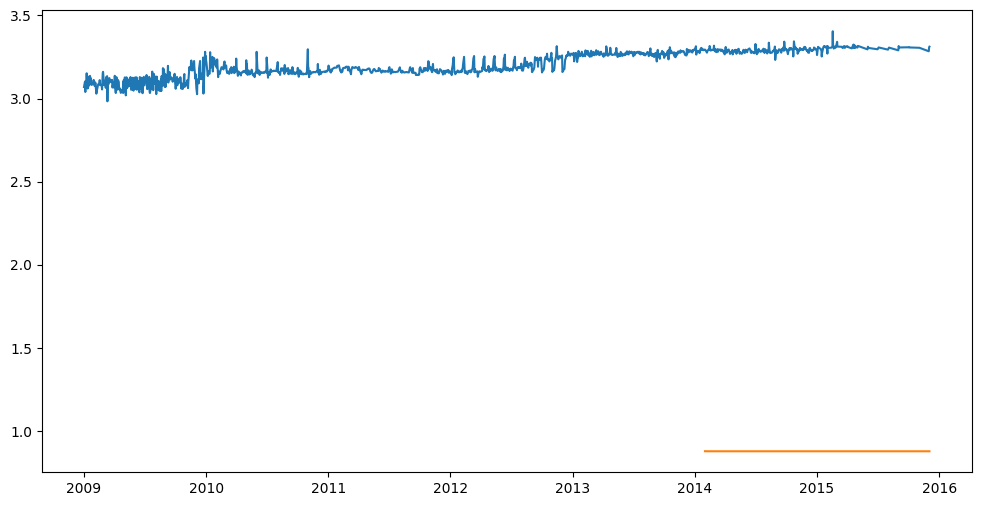

In [32]:
#Lets try transformation
plt.figure(figsize=(12,6))
fig = plt.figure(1)

import numpy as np
ts_log = np.log10(df)
plt.plot(ts_log)

In [7]:
print(ts_log)

               Price
Date                
2009-01-01  7.067198
2009-01-04  7.142827
2009-01-05  6.998510
2009-01-06  7.145787
2009-01-07  7.095790
...              ...
2015-11-02  7.610880
2015-11-03  7.610511
2015-12-01  7.562032
2015-12-02  7.617048
2015-12-03  7.625701

[1553 rows x 1 columns]


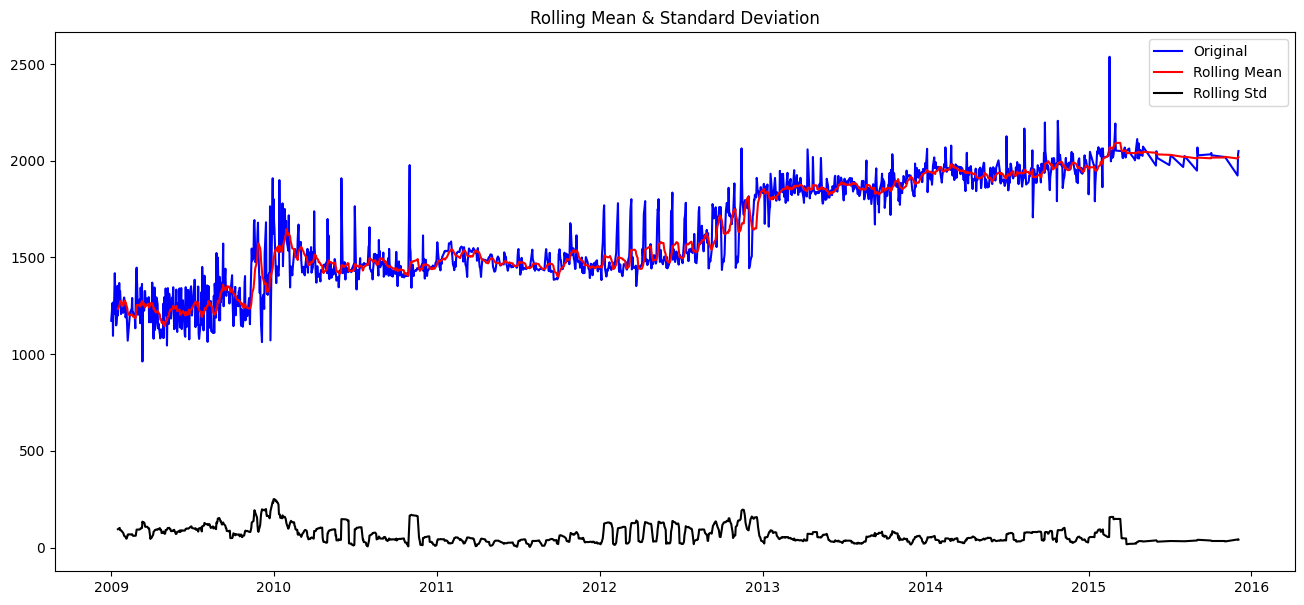

In [8]:
#Determing rolling statistics
rolLmean = df.rolling(12).mean()
rolLstd = df.rolling(12).std()

plt.figure(figsize=(16,7))
fig = plt.figure(1)

#Plot rolling statistics:
orig = plt.plot(df, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

# TRIAL

In [9]:
x = np.log(df)
print(x.head())

y = np.log10(df)
print(y.head())

               Price
Date                
2009-01-01  7.067198
2009-01-04  7.142827
2009-01-05  6.998510
2009-01-06  7.145787
2009-01-07  7.095790
               Price
Date                
2009-01-01  3.069245
2009-01-04  3.102091
2009-01-05  3.039414
2009-01-06  3.103376
2009-01-07  3.081662


In [10]:
temp = ts_log

# Define the split point (last 300 rows)
split_date = temp.index[-300]

# Create training data up to the split date
df_train = temp[temp.index < split_date].copy()

# Create testing data from the split date onwards
df_test = temp[ts_log.index >= split_date].copy()

print(df_train)
print(df_test)


               Price
Date                
2009-01-01  7.067198
2009-01-04  7.142827
2009-01-05  6.998510
2009-01-06  7.145787
2009-01-07  7.095790
...              ...
2014-01-23  7.597423
2014-01-24  7.582242
2014-01-27  7.576872
2014-01-28  7.585073
2014-01-30  7.584761

[1253 rows x 1 columns]
               Price
Date                
2014-01-31  7.584525
2014-02-01  7.583349
2014-02-04  7.558425
2014-02-05  7.548618
2014-02-06  7.542913
...              ...
2015-11-02  7.610880
2015-11-03  7.610511
2015-12-01  7.562032
2015-12-02  7.617048
2015-12-03  7.625701

[300 rows x 1 columns]


# Transform stationary : differencing 

<Axes: xlabel='Date'>

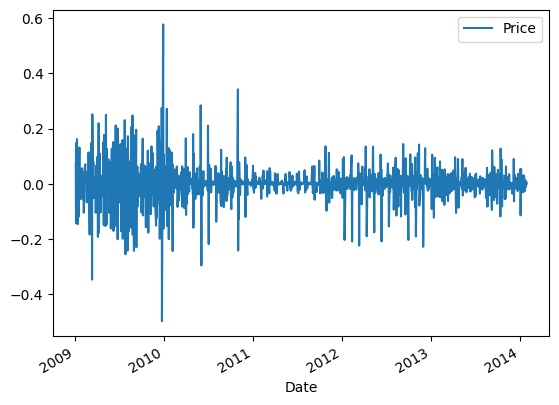

In [11]:
df_train_diff= df_train.diff().dropna()
df_train_diff.plot()

In [12]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(df_train_diff)
print(f'p-value:{adf_test[1]}')

p-value:2.0001812091771711e-28


In [13]:
from pmdarima import auto_arima

# Use multiple processors to speed up the ARIMA computation
stepwise_fit = auto_arima(df_train_diff['Price'], trace=True,
                          suppress_warnings=True)  # -1 uses all available processors


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-3589.106, Time=1.27 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-3144.659, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-3450.723, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-3547.490, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3146.614, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-3627.130, Time=0.87 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-3561.777, Time=0.58 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-3593.094, Time=0.45 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-3611.976, Time=1.00 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-3620.621, Time=0.75 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-3640.401, Time=0.51 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-3486.508, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-3638.385, Time=1.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-3513.332, Time=0.38 sec
 ARIMA(3,0,2)(0,0,0

Fit the arima model 

In [14]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order=(2,1,5))
model_fit = model.fit()
print(model_fit.summary())

c:\Users\swapn\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\swapn\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\swapn\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1253
Model:                 ARIMA(2, 1, 5)   Log Likelihood                1826.062
Date:                Sun, 08 Sep 2024   AIC                          -3636.123
Time:                        17:24:40   BIC                          -3595.063
Sample:                             0   HQIC                         -3620.689
                               - 1253                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3186      0.270      1.179      0.239      -0.211       0.848
ar.L2         -0.1657      0.200     -0.829      0.407      -0.557       0.226
ma.L1         -1.0015      0.272     -3.675      0.0

c:\Users\swapn\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Make time series predictions 

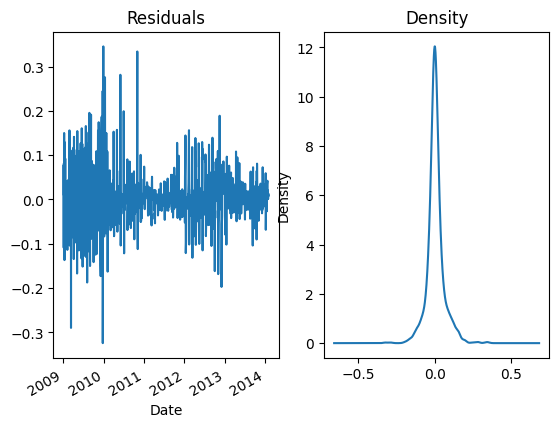

In [15]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

Forecasting 

In [16]:
import pmdarima as pm
auto_arima = pm.auto_arima(df_train, stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(0, 1, 5), scoring_args={}, suppress_warnings=True)

c:\Users\swapn\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\swapn\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='Date'>

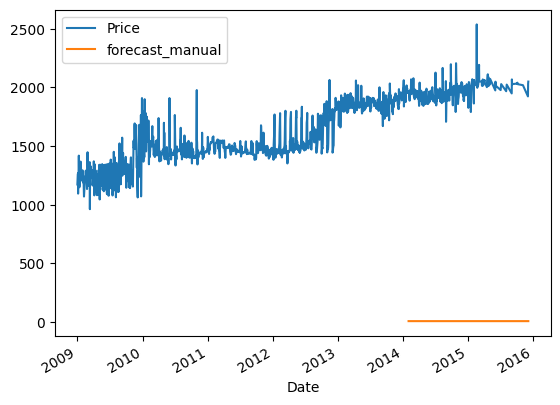

In [17]:
forecast_test = model_fit.forecast(len(df_test))

df['forecast_manual'] = [None]*len(df_train) + list(forecast_test)

df.plot()


# NORMAL OLD CODE FROM HERE 
AGAIN

## Log and differencing for making the data stationary

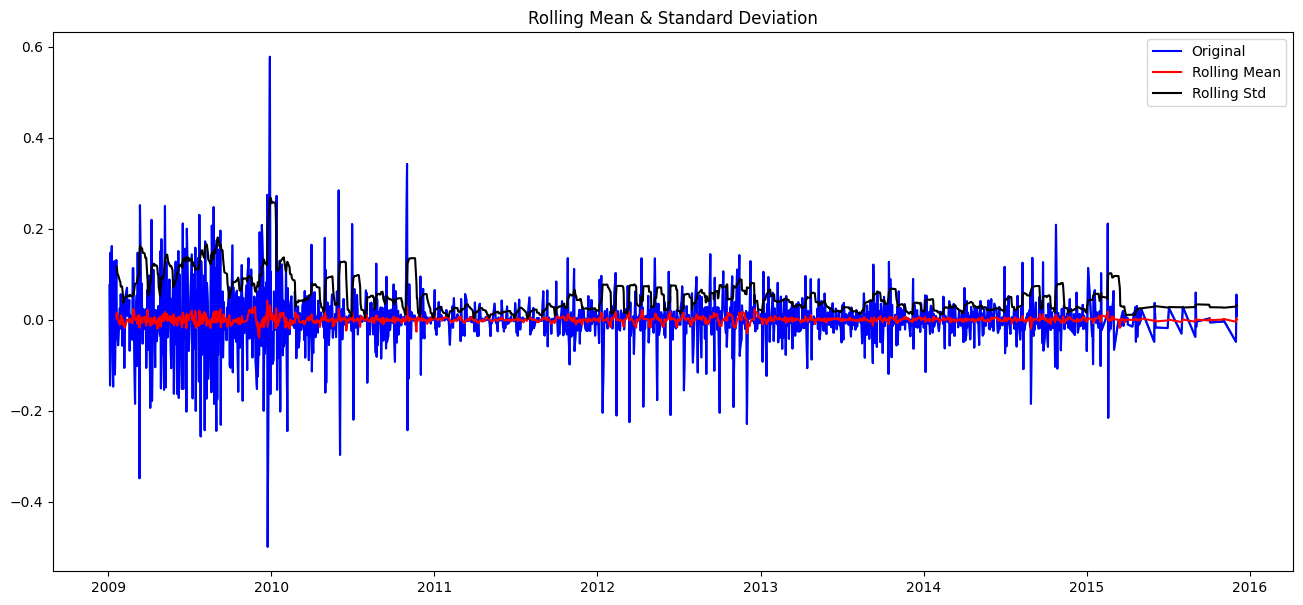

In [18]:
#Lets try differencing
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

#Determing rolling statistics
rolLmean = ts_log_diff.rolling(12).mean()
rolLstd = ts_log_diff.rolling(12).std()




#Plot rolling statistics:
orig = plt.plot(ts_log_diff, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [19]:
df.sort_index(inplace= True)

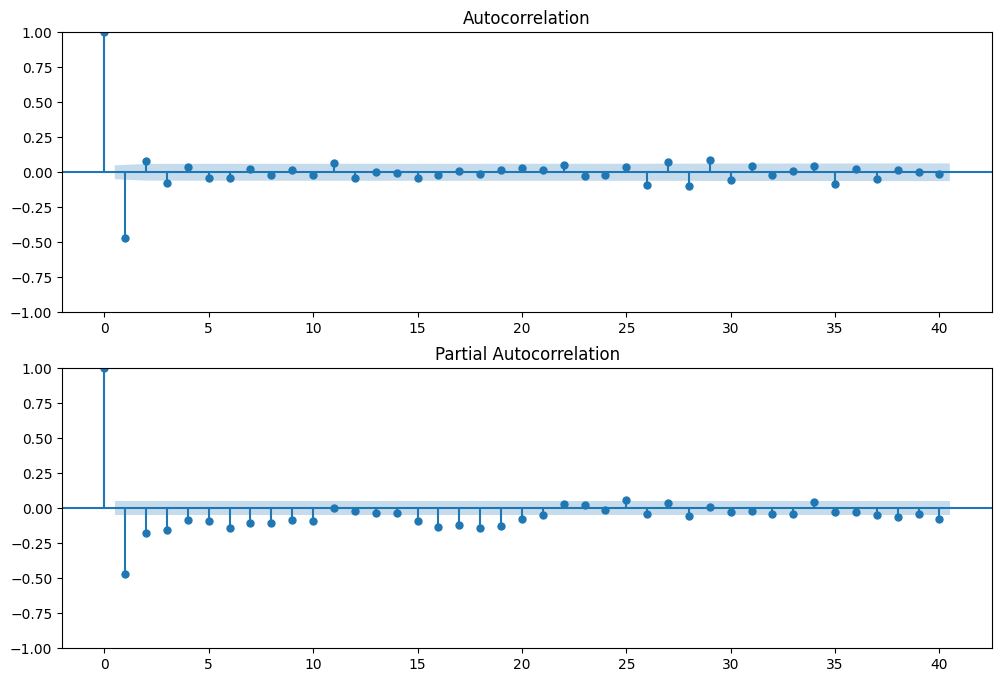

In [20]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20)
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags=40,ax=ax2)

In [21]:
ts_log_diff = ts_log_diff.dropna()
ts_log_diff

,Price
Date,
2009-01-04,0.075629
2009-01-05,-0.144318
2009-01-06,0.147278
2009-01-07,-0.049998
2009-01-09,0.161742
...,...
2015-11-02,-0.004051
2015-11-03,-0.000369
2015-12-01,-0.048479


In [22]:
 
from pmdarima import auto_arima

# Use multiple processors to speed up the ARIMA computation
stepwise_fit = auto_arima(ts_log_diff['Price'], trace=True,
                          suppress_warnings=True)  # -1 uses all available processors


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-4674.439, Time=1.53 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-4106.955, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-4491.323, Time=0.34 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-4621.065, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-4108.907, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-4718.529, Time=1.23 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-4643.406, Time=0.53 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-4678.234, Time=0.54 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-4717.442, Time=1.09 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-4712.972, Time=0.93 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-4728.732, Time=0.85 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-4538.585, Time=0.10 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-4727.372, Time=1.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-4573.561, Time=0.42 sec
 ARIMA(3,0,2)(0,0,0

In [23]:
print(ts_log_diff)

               Price
Date                
2009-01-04  0.075629
2009-01-05 -0.144318
2009-01-06  0.147278
2009-01-07 -0.049998
2009-01-09  0.161742
...              ...
2015-11-02 -0.004051
2015-11-03 -0.000369
2015-12-01 -0.048479
2015-12-02  0.055017
2015-12-03  0.008653

[1552 rows x 1 columns]


c:\Users\swapn\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\swapn\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\swapn\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


               Price
Date                
2009-01-04  0.075629
2009-01-05 -0.144318
2009-01-06  0.147278
2009-01-07 -0.049998
2009-01-09  0.161742
...              ...
2015-11-02 -0.004051
2015-11-03 -0.000369
2015-12-01 -0.048479
2015-12-02  0.055017
2015-12-03  0.008653

[1552 rows x 1 columns]
Date
2009-01-04    0.000323
2009-01-05   -0.035046
2009-01-06    0.066920
2009-01-07   -0.058295
2009-01-09    0.009663
                ...   
2015-11-02    0.005127
2015-11-03    0.006672
2015-12-01    0.005989
2015-12-02    0.039552
2015-12-03   -0.010079
Length: 1552, dtype: float64


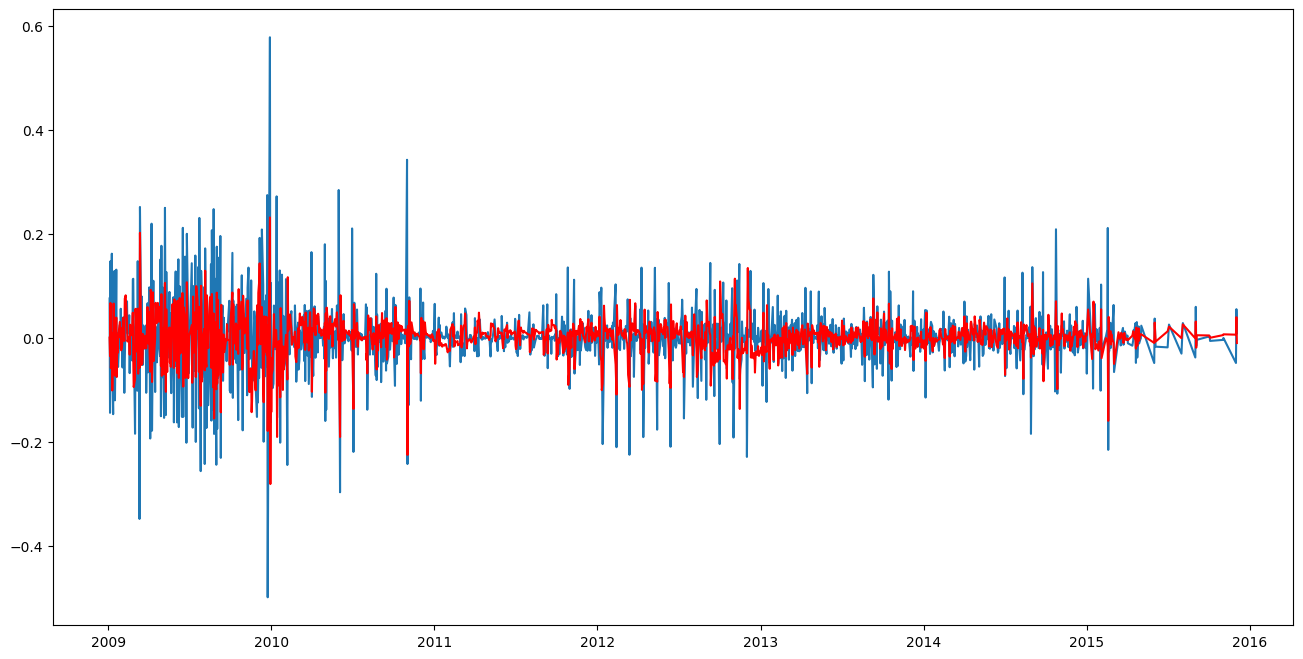

In [24]:
from statsmodels.tsa.arima.model import ARIMA
type(ts_log_diff)
plt.figure(figsize=(16,8))
#ts_log_diff.dropna(inplace=True)
model = ARIMA(ts_log_diff, order=(2,0,1))  
results_ARIMA = model.fit()  
print(ts_log_diff)
print(results_ARIMA.fittedvalues)
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

Taking values back to orignal

In [25]:
ARIMA_diff_predictions = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(ARIMA_diff_predictions)



Date
2009-01-04    0.000323
2009-01-05   -0.035046
2009-01-06    0.066920
2009-01-07   -0.058295
2009-01-09    0.009663
                ...   
2015-11-02    0.005127
2015-11-03    0.006672
2015-12-01    0.005989
2015-12-02    0.039552
2015-12-03   -0.010079
Length: 1552, dtype: float64


In [26]:
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum)



Date
2009-01-04    0.000323
2009-01-05   -0.034722
2009-01-06    0.032198
2009-01-07   -0.026097
2009-01-09   -0.016434
                ...   
2015-11-02    0.353842
2015-11-03    0.360514
2015-12-01    0.366503
2015-12-02    0.406055
2015-12-03    0.395976
Length: 1552, dtype: float64


In [27]:
ARIMA_log_prediction = pd.Series(ts_log.iloc[0], index=ts_log.index)
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value=0)
ARIMA_log_prediction = ARIMA_log_prediction.dropna()
ARIMA_log_prediction

Date
2009-01-04    0.000323
2009-01-05   -0.034722
2009-01-06    0.032198
2009-01-07   -0.026097
2009-01-09   -0.016434
                ...   
2015-11-02    0.353842
2015-11-03    0.360514
2015-12-01    0.366503
2015-12-02    0.406055
2015-12-03    0.395976
Length: 1552, dtype: float64

In [28]:
predictions_ARIMA = np.exp(ARIMA_log_prediction)
print(predictions_ARIMA)

print(df)



Date
2009-01-04    1.000323
2009-01-05    0.965874
2009-01-06    1.032722
2009-01-07    0.974241
2009-01-09    0.983700
                ...   
2015-11-02    1.424530
2015-11-03    1.434066
2015-12-01    1.442680
2015-12-02    1.500885
2015-12-03    1.485833
Length: 1552, dtype: float64
                  Price  forecast_manual
Date                                    
2009-01-01  1172.857143              NaN
2009-01-04  1265.000000              NaN
2009-01-05  1095.000000              NaN
2009-01-06  1268.750000              NaN
2009-01-07  1206.875000              NaN
...                 ...              ...
2015-11-02  2020.054545         7.570906
2015-11-03  2019.309091         7.570906
2015-12-01  1923.750000         7.570906
2015-12-02  2032.553571         7.570906
2015-12-03  2050.218182         7.570906

[1553 rows x 2 columns]


TypeError: unsupported operand type(s) for +: 'int' and 'str'

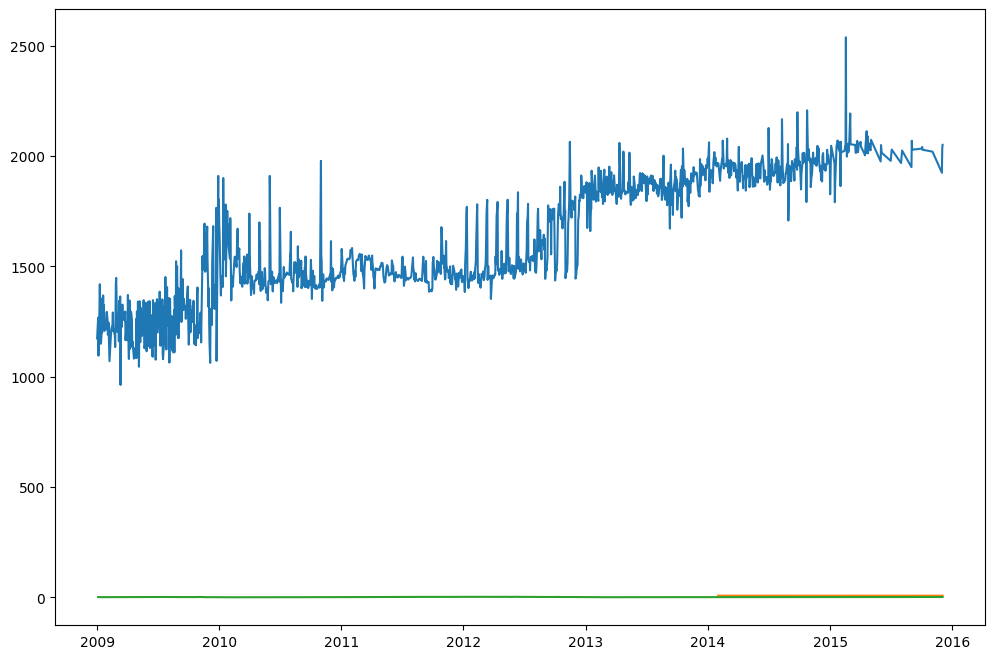

In [29]:
plt.figure(figsize=(12,8))
predictions_ARIMA = np.exp(ARIMA_log_prediction)
plt.plot(df)
plt.plot(predictions_ARIMA)
# plt.plot(df)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-df)**2)/len(df)))